# II Programming and Critical Analysis

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Data

In [3]:
parkinsons = pd.read_csv("Parkinsons data.csv")

In [4]:
parkinsons.head(3)

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,target
0,0.815695,-0.682509,-1.632090,0.082905,-0.284242,0.327453,-0.028637,0.328505,-0.324594,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658,34.398
1,0.815695,-0.682509,-1.500676,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,-1.218585,34.894
2,0.815695,-0.682509,-1.369410,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318711,-0.784860,-1.540139,-0.103280,35.389


## Separate Labels

In [5]:
type(parkinsons)

pandas.core.frame.DataFrame

In [6]:
y = parkinsons["target"]
X = parkinsons.drop("target", axis=1)

## 5

### Split dataset

In [7]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

In [18]:
model_creators = {
    'Linear Regression': lambda: LinearRegression(),
    'MLP (No Activation)': lambda: MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0),
    'MLP (ReLU)': lambda: MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
}

mae_results = {name: [] for name in model_creators}

In [19]:
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    for name, create_model in model_creators.items():
        model = create_model() 
        mae = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        mae_results[name].append(mae)

/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

/tmp/ipykernel_23225/4160531114.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(list(mae_results.values()), labels=list(mae_results.keys()))


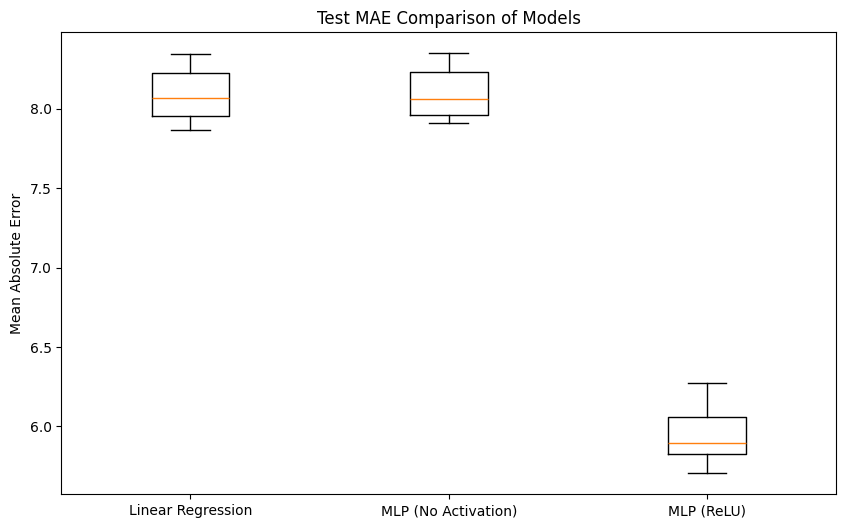

In [20]:
plt.figure(figsize=(10, 6))
plt.boxplot(list(mae_results.values()), labels=list(mae_results.keys()))
plt.title('Test MAE Comparison of Models')
plt.ylabel('Mean Absolute Error')
plt.show()

## 6
As we can see, Linear Regression and MLP with no activation perform pratically the same, even with 2 hidden layers of 10 neurons.

The main problem with using no activation in the MLP, this is, using the linear unit, is that the model will be unable to approximate non-linear functions well, this is because an MLP without activation is in practice equivalent to linear regression.

This is corroborated by the box plot, as no activation MLP performs similarly to Linear Regression, but MLP with a Rectified LU activation performs much better with a smaller MAE.


## 7

In [41]:
params = {
  'batch_size': [32, 64, 128],
  'learning_rate_init': [0.001, 0.01, 0.1],
  'alpha': [0.0001, 0.001, 0.01]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [112]:
results = []
for size in params['batch_size']:
  rate_results = []
  for rate in params['learning_rate_init']:
    alpha_results = []
    for alpha in params['alpha']:
      model = MLPRegressor(hidden_layer_sizes=(10, 10), batch_size=size, alpha=alpha, learning_rate_init=rate, random_state=0)
      mae = train_and_evaluate(model, X_train, X_test, y_train, y_test)
      alpha_results += [float(mae)]
    rate_results += [alpha_results]
  results += [rate_results]
results

/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/win/Users/user/Documents/Apre/Apre-HW3/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

[[[4.613615432822117, 4.616149690432312, 4.629431573044912],
  [4.563311573351935, 3.6509601112712984, 4.806363538950318],
  [5.120097807584959, 5.688975627705023, 6.438345435584971]],
 [[4.896498787615926, 4.905205127971713, 4.896917372338429],
  [4.335293325591365, 4.648430940003702, 4.531847094595358],
  [4.885892487481562, 6.637395888182, 5.659605405931181]],
 [[5.457825088557079, 5.454934918511987, 5.459818871432259],
  [4.428649685542129, 4.56292520186524, 4.561226273461671],
  [4.387150661966637, 5.373966286354446, 4.213453185697538]]]

Batch size = 32


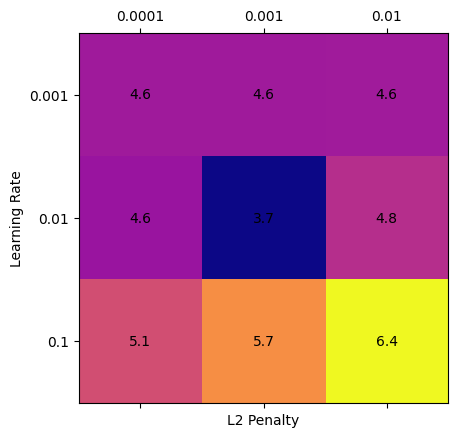

Batch size = 64


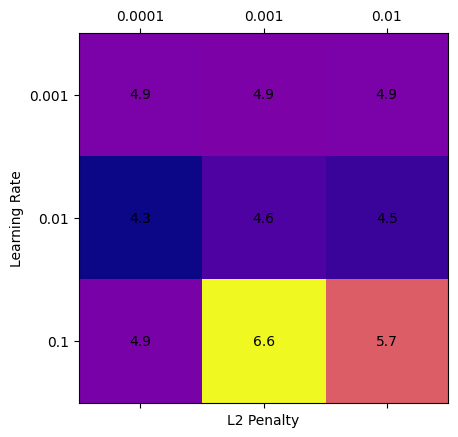

Batch size = 128


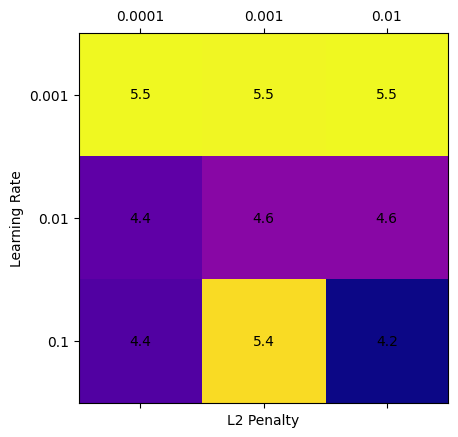

In [142]:
print("Batch size =", params['batch_size'][0])
fig, ax = plt.subplots()
values=results[0]
ax.matshow(values, cmap='plasma')
for (i, j), z in np.ndenumerate(values):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel("L2 Penalty")
ax.set_ylabel("Learning Rate")
plt.setp(ax, xticks=range(3), xticklabels=params['alpha'], yticks=range(3), yticklabels=params['learning_rate_init'])
plt.show()

print("Batch size =", params['batch_size'][1])
fig, ax = plt.subplots()
values=results[1]
ax.matshow(values, cmap='plasma')
for (i, j), z in np.ndenumerate(values):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel("L2 Penalty")
ax.set_ylabel("Learning Rate")
plt.setp(ax, xticks=range(3), xticklabels=params['alpha'], yticks=range(3), yticklabels=params['learning_rate_init'])
plt.show()

print("Batch size =", params['batch_size'][2])
fig, ax = plt.subplots()
values=results[2]
ax.matshow(values, cmap='plasma')
for (i, j), z in np.ndenumerate(values):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel("L2 Penalty")
ax.set_ylabel("Learning Rate")
plt.setp(ax, xticks=range(3), xticklabels=params['alpha'], yticks=range(3), yticklabels=params['learning_rate_init'])
plt.show()

According to our grid search, the best combination of hyperparameters seems to be a batch size of 32, a learning rate of 0.01 and a L2 Penalty of 0.001. With the 80-20 train-test split it performed with a Mean Absolute Error of 3.7 which is below the alternatives.

With a very low learning rate of 0.001 the model doesn't seem to perform very well, and seems to not be affected by the L2 Penalty, this might be because it converges very little, since it stops at 200 iterations.

A learning rate of 0.01 seems to perform usually the best, while a learning rate of 0.1 is, as expected, more chaotic than the rest.
The batch size doesn't seem to have a big impact but smaller learning rates perform better with smaller batch sizes and larger batch sizes with greater learning rates.